<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center>Attention Mechanisms and Transformers.</center></h1>

<center><img src="https://cdn.pixabay.com/photo/2018/03/06/08/31/drone-3202860_1280.jpg" width="720"/></center>

<center><font size=5>Product Reviews Sentiment Analysis </center></font>

## Problem Statement

### Business Context

In the rapidly evolving landscape of e-commerce, customer reviews play a pivotal role in shaping the perception of products and influencing purchasing decisions. All businesses recognize the significance of understanding customer sentiment and extracting valuable insights from the vast pool of customer reviews to drive decisions. The inability to actively track customer feedback can result in significant challenges for businesses. Negative sentiments expressed by customers become crucial to track and resolve as they can lead to several detrimental effects, including:

1. Customer Churn: Unaddressed negative sentiment can lead to customer dissatisfaction and the potential loss of loyal customers. This may result in customers opting for alternative platforms for their future purchases, impacting long-term revenue and market share.

2. Reputation Damage: The persistence of negative sentiment, if not effectively managed, can tarnish the reputation of the business. Potential customers may be dissuaded from making purchases on the platform due to concerns raised in negative reviews, affecting brand loyalty and trust.

3. Financial Implications: Negative sentiment can lead to a decline in sales, impacting profitability. Discouraged by negative feedback, potential customers may choose competitors, resulting in direct financial repercussions for the company.

### Problem Definition

A rising e-commerce platform in the space of electronic gadgets captures customer feedback through different channels, such as product review forms, surveys, and more. In addition, they also capture customer feedback from social media platforms. After witnessing a 200% growth in their customer base in the last three years, they are now experiencing a substantial upswing in the number of customer feedbacks received, with a noteworthy increase of ~25% over the past six months.

As they were previously monitoring customer feedback manually, this surge in customer feedback presents a multifaceted challenge for the business as the volume of reviews has surpassed the manual capacity to track and analyze effectively. Recognizing the need for a proactive and scalable solution, the organization seeks to employ artificial intelligence (AI) to aid them. The primary objective is to develop an AI solution that can automatically assess and categorize customer sentiments as negative, positive, or neutral by parsing and analyzing product reviews. As a Data Scientist, you are provided with the reviews shared by customers regarding their experience with the product along with the manually labeled sentiments of the reviews and asked to analyze the data and build a predictive model that can parse the customer reviews and predict the sentiment of the customer.

### Data Dictionary

- **Product ID**: An exclusive identification number for each product

- **Product Review**: Insights and opinions shared by customers about the product

- **Sentiment**: Sentiment associated with the product review, indicating whether the review expresses a positive, negative, or neutral sentiment

## Importing the necessary libraries

In [ ]:
# installing the libraries for transformers
!pip install -U -q sentence-transformers transformers bitsandbytes accelerate sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 24.9 MB/s eta 0:00:00


In [ ]:
# to read and manipulate the data
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)    # setting column to the maximum column width as per the data

# to visualise data
import matplotlib.pyplot as plt
import seaborn as sns

# Deep Learning library
import torch

# to load transformer models
from sentence_transformers import SentenceTransformer
from transformers import T5Tokenizer, T5ForConditionalGeneration, pipeline

# to split the data
from sklearn.model_selection import train_test_split

# to compute performance metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# To build a Random Forest model
from sklearn.ensemble import RandomForestClassifier


# to ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# loading data into a pandas dataframe
reviews = pd.read_csv("/content/Product_Reviews.csv")

In [ ]:
# creating a copy of the data
data = reviews.copy()

## Data Overview

### Checking the first five rows of the data

In [ ]:
data.head(5)

,Product ID,Product Review,Sentiment
0,AVpe7AsMilAPnD_xQ78G,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",POSITIVE
1,AVpe7AsMilAPnD_xQ78G,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now have that feeling! That desire is back and I simply adore my Kindle. If you are considering purchasing one, stop thinking about it simply go for it. After a full week, 3 downloaded books, and a ton of reading, I still have half of my battery left as well.Make yourself happy. Inspire the reader inside of you.",POSITIVE
2,AVpe7AsMilAPnD_xQ78G,I am enjoying it so far. Great for reading. Had the original Fire since 2012. The Fire used to make my eyes hurt if I read too long. Haven't experienced that with the Paperwhite yet.,POSITIVE
3,AVpe7AsMilAPnD_xQ78G,"I bought one of the first Paperwhites and have been very pleased with it its been a constant companion and I suppose Ive read, on average, a book every three days for the past however many years on it. I wouldnt give it up youd have to pry it from my cold dead fingers.For sundry logistical reasons, Ive also made good use of Amazons Kindle app on my iPhone. No Paperwhite screen, naturally, and all the cool usability that delivers, but it works well and has its own attractions as a companion to the Kindle.Of course, there are aspects of the Paperwhite which I would like to critique. Ah you knew that was coming somewhere, didnt you.As a member of BookBub, I get a daily list of alerts and book deals in my chosen genres. I take on many of them, however, Ive found that, even with the best will in the world, I cant keep up. Some days it seems that for every book I read, Ive bought two. Theres just so much good stuff out there! The accumulative effect of this is that the number of books actually on my Paperwhite has been creeping ever upward for some time. Its now at about 400.With this in mind, Ive noticed that while page-turning has remained exactly the 

### Checking the shape of the dataset

In [ ]:
data.shape

(1006, 3)

* The dataset has 1006 rows and 3 columns.

### Checking for Missing Values

In [ ]:
data.isnull().sum()

Product ID        0
Product Review    0
Sentiment         0
dtype: int64

* There are no missing values in the data

### Checking for duplicate values

In [ ]:
# checking for duplicate values
data.duplicated().sum()

2

* There are 2 duplicate values in the dataset.
* We'll drop them.

In [ ]:
# dropping duplicate values
data = data.drop_duplicates()

data.duplicated().sum()

0

## Exploratory Data Analysis (EDA)


In [ ]:
 # function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Distribution of sentiments

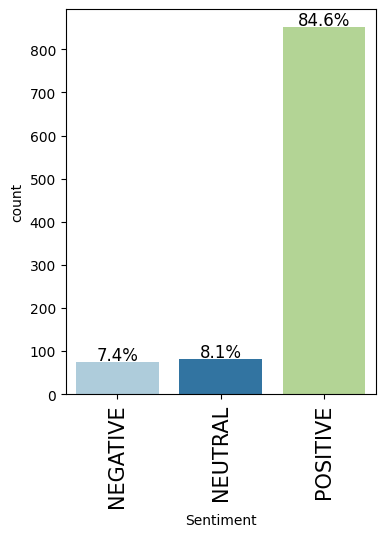

In [ ]:
labeled_barplot(data, "Sentiment", perc=True)

- Majority of the reviews are positive (\~85%), followed by neutral reviews (8%), and then the positive reviews (\~7%)

## Defining the Model

In [ ]:
# defining the model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# setting the device to GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# encoding the dataset
embedding_matrix = model.encode(data['Product Review'], device=device, show_progress_bar=True)

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

In [ ]:
# printing the shape of the embedding matrix
embedding_matrix.shape

(1006, 384)

In [ ]:
# printing the embedding vector of the first review in the dataset
embedding_matrix[0,:]

array([-6.76346421e-02, -2.20813751e-02,  5.92418648e-02,  7.95964450e-02,
        1.31207739e-03, -3.00335735e-02, -4.03319187e-02,  4.49672416e-02,
       -7.75716826e-02,  3.47503200e-02,  4.47142087e-02, -1.00544551e-02,
       -3.18467915e-02,  6.61095902e-02,  1.99794453e-02,  8.67501926e-03,
        4.62192968e-02, -1.06432647e-01, -7.67746046e-02,  8.88167620e-02,
        2.89339889e-02, -6.90294057e-02,  1.93163510e-02, -1.67264175e-02,
       -3.00858505e-02, -4.06527845e-03, -6.03297651e-02, -4.48418967e-02,
       -1.11918822e-02, -4.35903743e-02,  8.26880150e-03,  1.19993001e-01,
       -6.16409145e-02, -9.02840635e-04,  5.56043861e-03, -5.00543155e-02,
        8.40801224e-02, -1.02412462e-01,  6.85360655e-03, -1.57734743e-04,
        6.99327886e-03, -7.78147578e-02, -1.14781046e-02,  7.40694255e-02,
        1.58786308e-02, -5.03668264e-02,  4.27684747e-02,  9.10114944e-02,
       -3.01588066e-02,  3.78680937e-02,  4.32796665e-02, -6.61094412e-02,
        3.48587409e-02, -

## Data Pre-processing

### Splitting the dataset

In [ ]:
X = embedding_matrix
y = data["Sentiment"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape)

(754, 384) (252, 384)


In [ ]:
print(y_train.shape, y_test.shape)

(754,) (252,)


## Model Building - Transformers + ML

In [ ]:
# creating a function to plot the confusion matrix
def plot_confusion_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (5, 4))
    label_list = ['Negative', 'Neutral', 'Positive']
    sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = label_list, yticklabels = label_list)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
# Building the model
rf_transformer = RandomForestClassifier(n_estimators = 100, max_depth = 7, random_state = 42)

# Fitting on train data
rf_transformer.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, random_state=42)

In [ ]:
# Predicting on train data
y_pred_train = rf_transformer.predict(X_train)

# Predicting on test data
y_pred_test = rf_transformer.predict(X_test)

**Train Data**

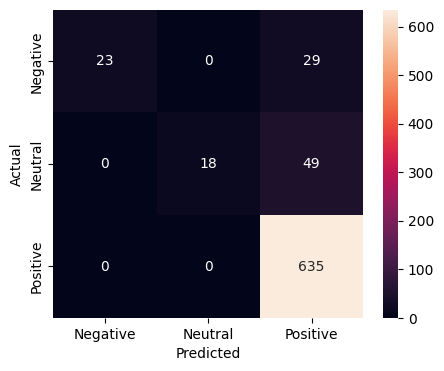

In [ ]:
plot_confusion_matrix(y_train, y_pred_train)

In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

    NEGATIVE       1.00      0.44      0.61        52
     NEUTRAL       1.00      0.27      0.42        67
    POSITIVE       0.89      1.00      0.94       635

    accuracy                           0.90       754
   macro avg       0.96      0.57      0.66       754
weighted avg       0.91      0.90      0.87       754



**Test Data**

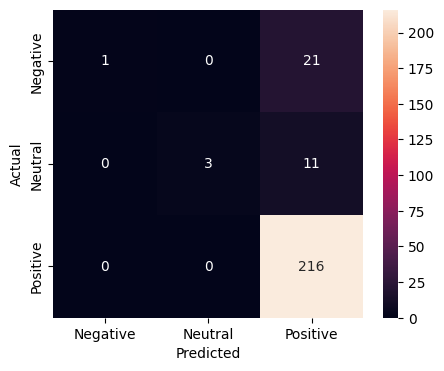

In [ ]:
plot_confusion_matrix(y_test, y_pred_test)

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

    NEGATIVE       1.00      0.05      0.09        22
     NEUTRAL       1.00      0.21      0.35        14
    POSITIVE       0.87      1.00      0.93       216

    accuracy                           0.87       252
   macro avg       0.96      0.42      0.46       252
weighted avg       0.89      0.87      0.83       252



## Model Building - Pre-Trained Transformers

### **DistilBERT**

In [ ]:
sentiment_hf = pipeline("sentiment-analysis") # this uses the HF default sentiment analysis model

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
trial_data = ["Love it! The Product is fantastic—sleek design, top-notch quality, and it exceeded my expectations. Highly recommended!"]
sentiment_hf(trial_data)

[{'label': 'POSITIVE', 'score': 0.999884843826294}]

In [ ]:
hf_review_dict = sentiment_hf(data['Product Review'].to_list(),truncation=True) # very long reviews will be truncated to 512 tokens...which isn't great!

In [ ]:
hf_review_sent = [0]*len(data['Product Review'])

for product in range(len(data['Product Review'])):
    if hf_review_dict[product]['label'] == 'POSITIVE':
        hf_review_sent[product] = 'POSITIVE'
    elif hf_review_dict[product]['label'] == 'NEUTRAL':
        hf_review_sent[product] = 'NEUTRAL'
    else:
        hf_review_sent[product] = 'NEGATIVE'

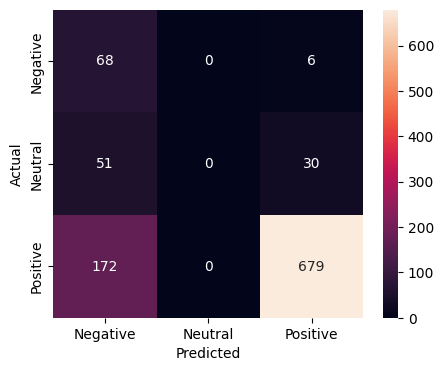

In [ ]:
plot_confusion_matrix(y, hf_review_sent)

In [ ]:
print(classification_report(y, hf_review_sent))

              precision    recall  f1-score   support

    NEGATIVE       0.23      0.92      0.37        74
     NEUTRAL       0.00      0.00      0.00        81
    POSITIVE       0.95      0.80      0.87       851

    accuracy                           0.74      1006
   macro avg       0.39      0.57      0.41      1006
weighted avg       0.82      0.74      0.76      1006



### **FLAN-T5**

In [ ]:
# Defining the input and target variables
X = data['Product Review']
y = data["Sentiment"]

In [ ]:
# initializing a T5 tokenizer using the pre-trained model
tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-large")

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
# initializing a T5 model for conditional generation using the pre-trained model "google/flan-t5-large"
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-large", load_in_8bit=True, device_map="auto")

config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [ ]:
# defining a function to generate, process, and return a response
def generate_response(prompt):
    input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to("cuda")    ### using the tokenizer to create tokens in tensor format from an input
    outputs = model.generate(input_ids, max_length=16, do_sample=True, temperature=0.001)    ### generating the model output in tensor format
    return tokenizer.decode(outputs[0])[6:-4]    ### using the tokenizer to decode the model output, and then return it

In [ ]:
# checking a customer review and it's sentiment
print('Review:\t', X[4])
print('Actual Sentiment:\t', y[4])

Review:	 I have to say upfront - I don't like coroporate, hermetically closed stuff like anything by Apple or in this case, Amazon. I like having devices on which I can put anything I want and use it. But...I was a fairly happy user of a Nook Touch for several years, but couldn't use all its functionalities since I live in Serbia. Then I lost the Nook and since no other devices can actually be fully used in Serbia (buying books with them, using their online capabilities) except the Kindle, and since no one except Amazon ships to Serbia, and since I've actually been a happy Amazon customer since 2005 over friends' accounts and since 2007 through my own, and since the Kindle definitely has the best technology - why not buy itSo I did. What I read in many reviews about the screen/light of the Paperwhite and similar devices was no problem with mine. The light disperses just fine, except a few black blotches (maybe you can see it in the picture) at the bottom of the screen, which are actual

In [ ]:
# defining a prompt which tells the model what to do
sys_prompt = """
    Categorize the sentiment of the review as positive or negative or neutral.
    Return NEGATIVE for negative, NEUTRAL for neutral and POSITIVE for positive
"""

# predicting the sentiment using the model by incorporating the system prompt and the provided review text

pred_sent = generate_response(
    """
        {}
        Review text: '{}'
    """.format(sys_prompt, X[4])
)

print(pred_sent)

POSITIVE


- The model was able to correctly identify the sentiment here.

In [ ]:
# defining a function to generate a sentiment prediction
def predict_sentiment(review_text):
    pred = generate_response(
        """
            {}
            Review text: '{}'
        """.format(sys_prompt, review_text)
    )

    return pred

In [ ]:
# making predictions with the model
predicted_sentiment = [predict_sentiment(X[item]) for item in range(len(X))]
# must be careful with an LLM. It just gives you what it 'thinks' you want, which may not be what you actually want
# it's not uncommon for the returned value to not match the format you ask for!
# for example, several times predict_sentiment has returned '2 for positive' instead of just 2!

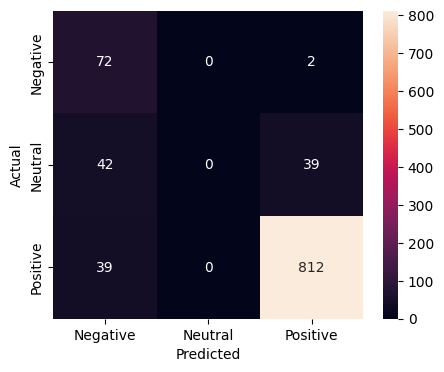

In [ ]:
plot_confusion_matrix(y, predicted_sentiment)

In [ ]:
print(classification_report(y, predicted_sentiment))

              precision    recall  f1-score   support

    NEGATIVE       0.47      0.97      0.63        74
     NEUTRAL       0.00      0.00      0.00        81
    POSITIVE       0.95      0.95      0.95       851

    accuracy                           0.88      1006
   macro avg       0.47      0.64      0.53      1006
weighted avg       0.84      0.88      0.85      1006



# Conclusion

- We analyzed the distribution of sentiments of the customers.

- We then built an ML model (Random Forest) with the Sentence transformer and pre-trained models (using pipeline and LLM prompt).

- The Random Forest with encodings from sentence transformer model is the best model and was able to achieve a recall score of 90% and 87% on the train and test dataset respectively.

- By pinpointing areas of improvement or concerns raised by customers based on the predictions of the model, the organization can take swift and targeted actions to address issues, minimizing the risk of revenue loss and bolstering customer satisfaction.

- The organization can leverage sentiment categorizations to tailor marketing strategies.
    - Highlighting positive sentiments in promotional material can contribute to a positive brand image.
    - They can use neutral and negative sentiments to make informed decisions around inventory.

<font size=6 color='blue'>Power Ahead</font>
___